## Máster en Inteligencia Artificial Aplicada
## Unidad: Deep Learning - Caso Práctico 2 / Cifar-100
## Implementación de una CNN para clasificación de imágenes

#### Nombre: Patricio Galván
#### Fecha: 05 de Octubre de 2024

### Contenido:


1. Preparacion de Bibliotecas y Funciones para Redes Neuronales CNN
2. Cargamos el Data Setcifar 100
3. Preprocesamiento de datos
4. Modelaciones   
  4.1. Modelo 1  
  4.2. Modelo 2  
  4.3. Modelo 3  

**Resumen**  
  Se desarrollado el analisis de 3 modelos de arquitectura con diferentes parametros. Hemos llegado a un accurazy de 52% con el mejor modelo.

* Modelo 1:
  - Test accuracy: 29.82 %
  - Test Loss: 2.8634
  - Clase manzana 59% y Serpiente 8%.

* Modelo 2:
  - Test accuracy: 48.51 %
  - Test Loss: 1.9849
  - Clase manzana 76% y Serpiente 25%.

* Modelo 3:
  - Test accuracy: 52.43 %
  - Test Loss: 1.8668
  - Clase manzana 90.7% y Serpiente 25.5%.
Tanto el Accuracy como el Loss entropy han mejorado, no obstante no ha sido una


**Conclusion**  
La ultima modelacion ha entregado resultados mejores que la segunda.

Tanto el Accuracy como el Loss Entropy han mejorado, no obstante no ha sido una mejora tan sustancial.

Se puede observar que el Accuracy llegó a 45% en 12 epochs, a diferencia del modelo 2 que lo alcanza a los 22 epochs. Esto hace pensar que el modelo es mas potente, no obstante despues de llegar a este nivel de Accuracy el mejoramiento comienza a estabilizarse, alcanzando el 52%, solo 7% más.

Este comportamiento hacer pensar que podriamos probar con un tercer bloque de convolucion y una segunda capa densa en la salida, pero probar esta arquitectura significaría un alto costo computacional.

La Clase manzana ha ido mejorando su accurracy en todos los modelos, no obstante la clase serpiente no mejoró despues del modelo 2.

Tambien cabe la posibilidad que la naturaleza tan poco definida de las imagenes de los datos, no sea la apropiada y nunca podriamos llegar a un Accuracy relativamente alto.


**Arquitectura Propuesta**  
* Bloque 1:
  Dos capas convolucionales , con 128 filtros y un tamaño del kernel de 4x4.
  Dropout 25% + BAtch Normaliation y una capa de pooling con un tamaño de ventana de 2x2.

* Bloque 2:
  Dos capas convolucionales , con 256 filtros y un tamaño del kernel de 3x3.
  Dropout 25% + BAtch Normaliation y una capa de pooling con un tamaño de ventana de 2x2.

* Bloque 3:
  Dos capas convolucionales , con 512 filtros y un tamaño del kernel de 2x2.
  Dropout 25% + BAtch Normaliation y una capa de pooling con un tamaño de ventana de 2x2.

* Perceptrón Multicapa para Clasificación
  Una capa de flatten para convertir a un vector de una dimensión.
  Tres capas densas con 256 neuronas y dropout 25%.
  Una última capa de 10 neuronas para clasificar las muestras.

Considerar Aumento de imagenes.


Se adjunta imagen con los mejores valores logrados para el analisis de Cifar 100. Se ve que se ha llegado a 95%.

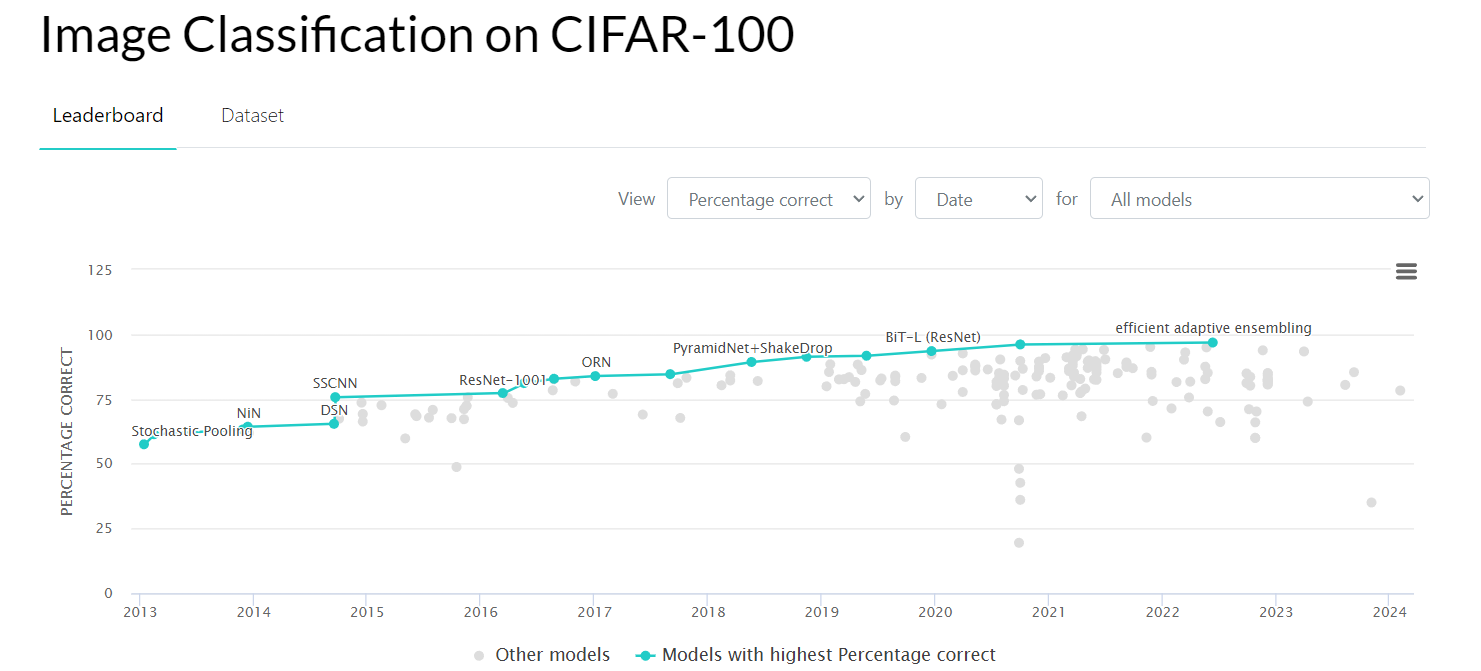

## Descripccion del dataset CIFAR-100

El dataset CIFAR-100 es un conjunto de datos ampliamente utilizado en la investigación de visión por computadora, diseñado específicamente para tareas de clasificación de imágenes. Contiene 60,000 imágenes a color de tamaño 32x32 píxeles, distribuidas en 100 clases diferentes. Cada clase tiene 600 imágenes, con 500 destinadas al entrenamiento y 100 a la prueba. Las clases cubren una amplia gama de objetos y escenas, que van desde animales (como "mapache", "ballena") hasta objetos cotidianos (como "reloj", "lápiz") y medios de transporte (como "avión", "bicicleta").

`El dataset está dividido en dos partes:`

* 50,000 imágenes para el conjunto de entrenamiento.
* 10,000 imágenes para el conjunto de prueba.

`Características clave:`
* 100 clases: Las imágenes están categorizadas en 100 clases, cada una con un nombre específico.
* 32x32 píxeles: Todas las imágenes tienen un tamaño fijo de 32x32, lo que las convierte en un desafío para capturar detalles finos.

* Etiquetas jerárquicas:*  
Las 100 clases están agrupadas en 20 "superclases", proporcionando una estructura jerárquica. Por ejemplo, las superclases incluyen categorías como "mamíferos", "insectos", "personas", entre otras.

`Resumen`

El CIFAR-100 es ideal para entrenar y evaluar modelos de redes neuronales profundas, particularmente arquitecturas convolucionales (CNN). Debido a la diversidad de clases y la pequeña resolución de las imágenes, este dataset es útil para medir la capacidad de un modelo para aprender características discriminativas en datos visuales complejos.

## Respuestas a las preguntas Planteadas

- 1. ¿Necesitaré una arquitectura igual a la utilizada para CIFAR-10?

  **Resp:** `La arquitectura puede ser similar, pero seria recomendable agregar mas neuronas en el bloque de salida, ya que el dataset es mas complejo y tiene mas clases. Tambien se debe considerar geenerar mas datos de entrenamiento, aumentando los datos. Tambien seria recomendable usar 3 bloques convolucionales en vez de 2, para captar la dificultad de este dataset. Por ultimos agregar mas neuronas en la capa densa para poder captar la complejidad de los patrones del nuevo dataset`

- 2. ¿Será un problema más o menos complicado para la red neuronal?

  **Resp**: `Claramente es un problemas mas complicado ya uqe en vez de un canal de color, tenemos 3. Ademas en vez de 10 clases tenemos 100.`

- 3. A la hora de evaluar las métricas, ¿debemos interpretarlas de la misma manera que cuando usamos CIFAR-10?

  **Resp**:`Al ser un problema mas complejo, la medicion de las metricas debe hacerse con otras herramientas. Por ejemplo, como el tiempo de computo es considerablemente mayor, debieramos intentar definir el minimo numero de epocs y bloques que requerimos, y esto se hace observando como varian en el tiempo las metricas de accuracy y Loss. Cuando las metrics de los valores de validacion empeoran significativamente en relacion a las metricas de training, sabemso que el modelo ya no puede generar mejores resultados y podemos detener el algorimo de fitting. Tambien podemos usar otras metricas de Clasificacion como la Matriz de Confusion, el f1score, Presicion, para poder ver cuales clases son las que no pudieron ser entendidas por el modelo.`

- 4. Si ya tengo una arquitectura válida para el dataset CIFAR-10, ¿qué es lo mínimo que tengo que cambiar de la red para poder entrenar la nueva red con CIFAR-100?

  **Resp** `Esta respuesta se complementa con las anteriores, pero lo minimo es ajustar el numero de neuronas en la salida, ya que ahora pasamos de 10 a 100. Agregamos 3 canales de entrada en vez de uno, ya que ahora tenemos 3 colores. `





## 1.0 Preparacion de Bibliotecas y Funciones para Redes Neuronales CNN

Importamos las Bibliotecas

In [ ]:
import numpy as np
from numpy import argmax
import random
import math
import time
from re import VERBOSE

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import keras
from keras.optimizers import Adam
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization
from keras.utils import to_categorical

import matplotlib.pyplot as plt

Generamos las funciones y herramientas  que usaremos para visualizar

In [ ]:
# Funcion para graficar el proceso de entrenamiento

def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.figure(figsize=(12,4)) # Set figure size to be wider
  plt.subplot(1,2,1) # Create subplot for accuracy
  plt.plot(epochs, acc, 'b.', label='Training accuracy') # Plot training accuracy in blue with dots
  plt.plot(epochs, val_acc, 'r-', label='Validation accuracy') # Plot validation accuracy in red with line
  plt.title('Training and validation accuracy')
  plt.legend() # Show legend

  plt.subplot(1,2,2) # Create subplot for loss
  plt.plot(epochs, loss, 'b.', label='Training loss') # Plot training loss in blue with dots
  plt.plot(epochs, val_loss, 'r-', label='Validation loss') # Plot validation loss in red with line
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
# Nombre de todas las clases CIFAR-100
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud','cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
    'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle','mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
    'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine','possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

## 2.0 Cargamos el DataSet Cifar-100

In [ ]:
# Cargar el conjunto de datos CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
n_classes = 100
print("Número de imágenes de entrenamiento:", len(x_train))
print("Número de imágenes de prueba:", len(x_test))
total_data = len(x_train) + len(x_test)
print("Número total de imágenes:", total_data)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Número de imágenes de entrenamiento: 50000
Número de imágenes de prueba: 10000
Número total de imágenes: 60000


## 3.0 Preprocesamiento de Datos


In [ ]:
# Normalizar los datos de píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convertir las etiquetas a vectores one-hot
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
# Número de muestras del conjunto de entrenamiento
print("Número de muestras del conjunto de entrenamiento:", x_train.shape[0])

# Número de muestras del conjunto de test
print("Número de muestras del conjunto de test:", x_test.shape[0])

Número de muestras del conjunto de entrenamiento: 50000
Número de muestras del conjunto de test: 10000


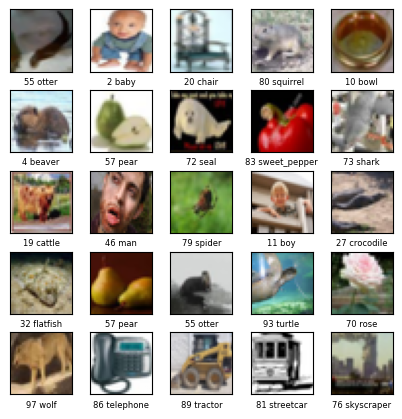

In [ ]:
# Visualizamos algunas imágenes del dataset
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Selecciona un índice aleatorio
    j = random.randint(0, len(x_train)-1)
    plt.imshow(x_train[j], cmap=plt.cm.binary)
    # Get the index of the class with highest probability
    label_index = np.argmax(y_train[j])
    # Reduce el tamaño de la fuente
    plt.xlabel(str(label_index) + ' ' + classes[label_index], fontsize=6)
plt.subplots_adjust(hspace=0.3)
plt.show()

Preparamos el generador de Imagenes que nos ayudara con el entrenamiento

In [ ]:
# Configurar la aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    )

datagen.fit(x_train)

In [ ]:
exit()

## 4.0 Modelaciones



## 4.1 Modelo 1 (Basico)
A continuacion realizaremos un modelo Simple de Punto de Partida, que nos servira para implementar el marco para evaluar los modelos que realizamos.

Definimos el modelo Base:

### Bloque 1:

Conv2D(32 filtros, tamaño de kernel 3x3, activación ReLU):
Esta capa convolucional utiliza 32 filtros de tamaño 3x3. ReLU introduce no linealidad, lo que ayuda a la red a aprender patrones complejos.
La entrada es de forma (32, 32, 3), que corresponde a la resolución de la imagen (32x32 píxeles) y 3 canales (RGB).

MaxPooling2D(pool_size=(2,2)):
Esta capa de pooling reduce la dimensionalidad de la salida de la capa anterior. MaxPooling con un tamaño 2x2 toma el valor máximo de un bloque 2x2, lo que reduce el tamaño espacial en un 50% (de 32x32 a 16x16).

### Bloque 2:

Conv2D(64 filtros, tamaño de kernel 3x3, activación ReLU):
En este segundo bloque, el número de filtros aumenta a 64, lo que permite a la red aprender más características detalladas.
ReLU nuevamente introduce no linealidad, lo que mejora la capacidad de la red para modelar relaciones complejas.

MaxPooling2D(pool_size=(2,2)):
Nuevamente, la capa de pooling reduce las dimensiones espaciales, de 16x16 a 8x8. Esto ayuda a reducir el número de parámetros y a prevenir el sobreajuste.

### Bloque 3:

Conv2D(64 filtros, tamaño de kernel 3x3, activación ReLU):
Otro bloque convolucional con 64 filtros. Repite la estrategia del Bloque 2 para aprender características más avanzadas del dataset.

MaxPooling2D(pool_size=(2,2)):
Reduce las dimensiones espaciales una vez más, de 8x8 a 4x4. Este último paso de reducción ayuda a compactar la información antes de pasarla a la capa completamente conectada.

### Perceptrón Multicapa para Clasificación
Flatten:
Esta capa convierte la salida de las capas convolucionales, que tienen forma de 4D (4x4x64), en una capa plana de una sola dimensión. Esto es necesario antes de conectar con capas densas.

Salida de la capa de Flatten: (4 * 4 * 64 = 1024) unidades.

Dense(64 unidades, activación ReLU):
Capa completamente conectada con 64 neuronas, lo que permite a la red aprender combinaciones de las características extraídas por las capas convolucionales. ReLU es útil para capturar relaciones no lineales.

Dense(100 unidades, activación softmax):
La capa de salida con 100 neuronas, una por cada clase en CIFAR-100. softmax convierte las salidas en probabilidades para la clasificación.

Optimizador: Usamos Adam con un learning rate bajo (0.0001) para asegurar una convergencia más estable.

**Comentario**

En los proximos modelos podriamos considerar:
Aplicar Data Augmentation usando ImageDataGenerator para mejorar la capacidad de generalización del modelo.
Mas capas convolucionales, usar Batch Normalization para estabilizar y acelerar el entrenamiento y Dropout para evitar que el modelo aprenda de memoria los datos.

In [ ]:
# Model Basico CNN
model = Sequential()

# Bloque 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
# Bloque 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Bloque 3
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Perceptron Multicapa para Clasificacion
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

#model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilamos, Entrenamos y Evaluamos el modelo.

In [ ]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

training_start = time.time()
history = model.fit(x_train, y_train, batch_size = 128 , epochs=40 ,validation_data=(x_test, y_test), verbose = 0)  #,steps_per_epoch = total_data // batch_size
training_stop = time.time()
training_time = round(training_stop - training_start,2)

print(f"Training time: {training_time}")

Training time: 43.47


In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc*100,2), '%')
print('Test Loss:', round(test_loss,4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 2.8558
Test accuracy: 29.82 %
Test Loss: 2.8634


Visualizamos nuestras Curvas de Entremiento

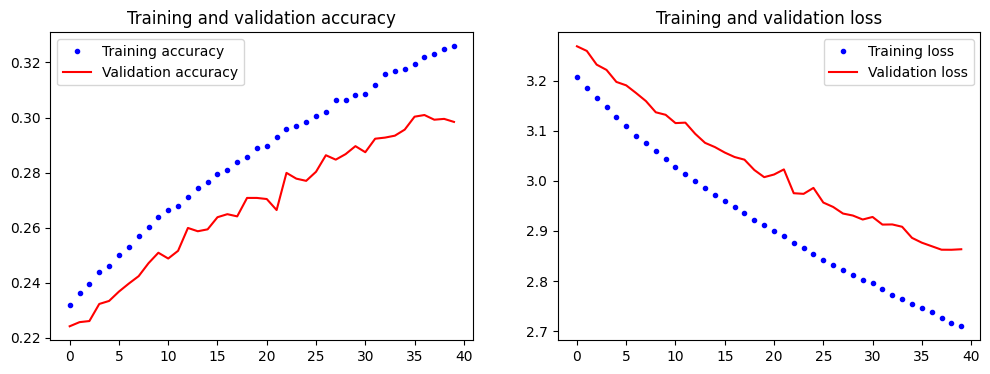

In [ ]:
# Visualize training process
training_plot(history)

Configuramos los labeles originales del Dataset para que contengan los datos de las clases. esto lo usaremos para ma Matriz de Confusion.  
Ademas, preparamos Codigo para que Imprima la Matriz de Confusion, tanto matricialmente como graficamente.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
10000
Matriz de Confusion
[[67  1  1 ...  0  1  0]
 [ 1 40  0 ...  0  1  0]
 [ 1  0 25 ...  1  4  0]
 ...
 [ 0  0  1 ... 22  3  0]
 [ 0  0  8 ...  0 16  0]
 [ 0  0  1 ...  0  1 29]]


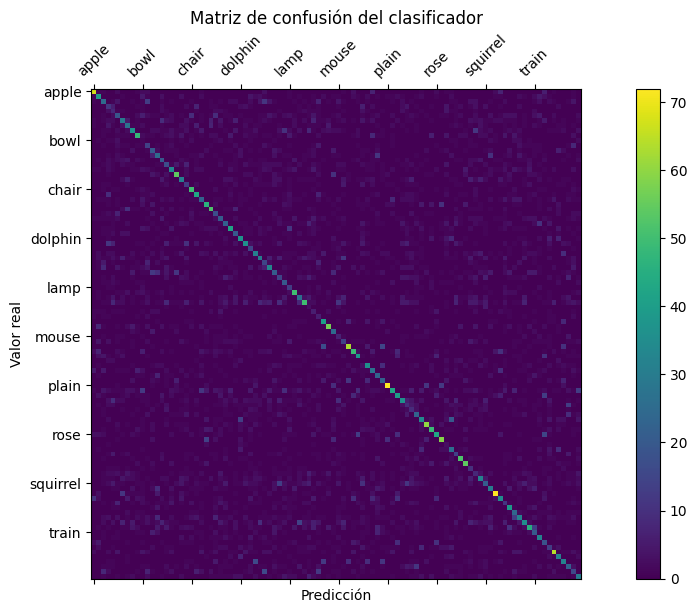

In [ ]:
# Configuramos los true_Labels
prediction = []
true_labels = []

pred = model.predict(x_test)
print(y_test.shape[0])
for i in range(y_test.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(y_test[i]))

# Definimos la matriz de Confusion
cm = confusion_matrix(prediction, true_labels)

# Imprimimos la Matriz de confusion
print("Matriz de Confusion")
print(cm)

# Graficamos la Matriz de Confusion
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Matriz de confusión del clasificador')
fig.colorbar(cax)

# Modificamos la frecuencia de las etiquetas para graficar
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks[::10], classes[::10], rotation=45)  # Mostrar cada 10 etiquetas en el eje x
plt.yticks(tick_marks[::10], classes[::10])  # Mostrar cada 10 etiquetas en el eje y

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

Imprimimos el reporte completo de la clasificaciones de la prediccion de las clases

In [ ]:
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

               precision    recall  f1-score   support

        apple    0.58772   0.67000   0.62617       100
aquarium_fish    0.37383   0.40000   0.38647       100
         baby    0.20492   0.25000   0.22523       100
         bear    0.14286   0.11000   0.12429       100
       beaver    0.16000   0.08000   0.10667       100
          bed    0.14844   0.19000   0.16667       100
          bee    0.20280   0.29000   0.23868       100
       beetle    0.27551   0.27000   0.27273       100
      bicycle    0.25342   0.37000   0.30081       100
       bottle    0.34783   0.48000   0.40336       100
         bowl    0.03226   0.01000   0.01527       100
          boy    0.21875   0.14000   0.17073       100
       bridge    0.25000   0.20000   0.22222       100
          bus    0.26042   0.25000   0.25510       100
    butterfly    0.24691   0.20000   0.22099       100
        camel    0.17895   0.17000   0.17436       100
          can    0.28814   0.34000   0.31193       100
       ca

**Comentario**

Lo que hemos realizado hasta ahora es basicamente preparar las herramientas de evaluacion que nos facilitaran la visualizacion de las modelaciones que realizaremos.
EL modelo que hemos realizado en realidad es muy simple, pero nos ha dado un punto de partida con los siguientes resultados:  
* Test accuracy: 29.82 %
* Test Loss: 2.8634


- La convergencia durante el proceso de entrenamiento fue siempre peor para los datos de validacion, esto se debe a que no usamos dropout, por lo que el modelo se aprende de memoria los datos.
- El proceso de entrenamiento lo hemos realizado hasta que vemos que las metricas de validacion comienzan a empeorar.
- A pesar de lo basico del modelo, en la matriz de confusion se puede ver claramente que hay elementos que han podido ser bien clasificados, con un buen buen acurracy, como la manzana (59%)y otros que no, como la serpiente 8%.

## 4.2 Modelo 2 (Cifar-10 modificado)

- Una primera capa convolucional, con 64 filtros y un tamaño del kernel de 4x4 `(en vez de 5x5)`.
- Otra capa convolucional con 64 filtros y un tamaño del kernel de 3x3. Dropout 20%.
- Una capa de pooling con un tamaño de ventana de 3x3.
- Dos capas convolucional de 128 filtros y tamaño de kernel de 3x3 seguidas.Dropout 20%.
- Otra capa de pooling con un tamaño de ventana de 2x2.
- Una capa de flatten para convertir a un vector de una dimensión.
- Una capa densa con 512 neuronas y dropout 25% `(en vez de 20%)`.
- Una última capa para clasificar las muestras.
- `A diferencia de la solucion original se considera Aumento de imagenes`.



In [ ]:
num_classes = 100

# Define the CNN architecture
model = Sequential()

# Block 1
model.add(Conv2D(64, (4, 4), padding='valid',activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Perceptron Multicapa para Clasificacion
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo con aumentación de datos

training_start = time.time()
history = model.fit(datagen.flow(x_train, y_train), batch_size = 128 , epochs=25 ,validation_data=(x_test, y_test), verbose = 1)
training_stop = time.time()
training_time = round(training_stop - training_start,2)

print(f"Training time: {training_time}")

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.0407 - loss: 4.3543 - val_accuracy: 0.1462 - val_loss: 3.6746
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.1417 - loss: 3.6787 - val_accuracy: 0.2173 - val_loss: 3.2881
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.1878 - loss: 3.4022 - val_accuracy: 0.2563 - val_loss: 3.0863
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.2220 - loss: 3.2044 - val_accuracy: 0.2929 - val_loss: 2.9131
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.2497 - loss: 3.0564 - val_accuracy: 0.3061 - val_loss: 2.8027
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.2759 - loss: 2.9301 - val_accuracy: 0.3372 - val_loss: 2.6833
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.2977 - loss: 2.8308 - val_accuracy: 0.3418 - val_loss: 2.6315
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3090 - loss: 2.73

In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc*100,2), '%')
print('Test Loss:', round(test_loss,4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4839 - loss: 1.9984
Test accuracy: 48.51 %
Test Loss: 1.9849


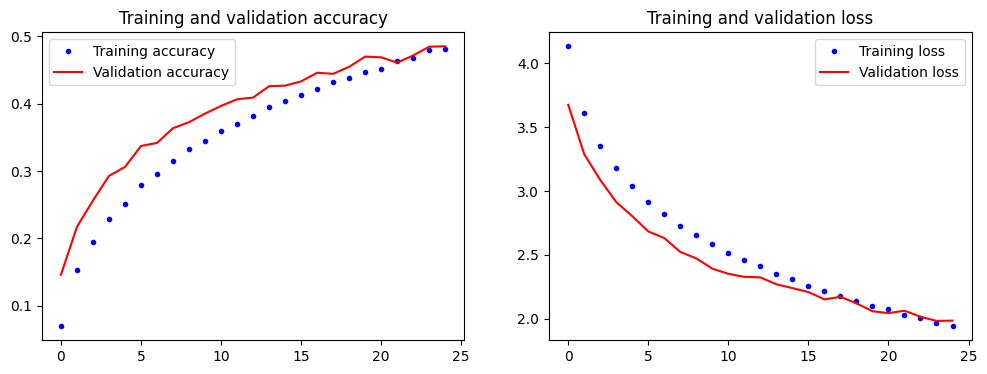

In [ ]:
# Visualize training process
training_plot(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
10000
Matriz de Confusion
[[77  0  0 ...  0  0  0]
 [ 1 65  0 ...  0  1  0]
 [ 0  0 35 ...  0  3  0]
 ...
 [ 0  0  1 ... 50  1  0]
 [ 0  0  4 ...  0 21  0]
 [ 0  1  0 ...  0  1 48]]


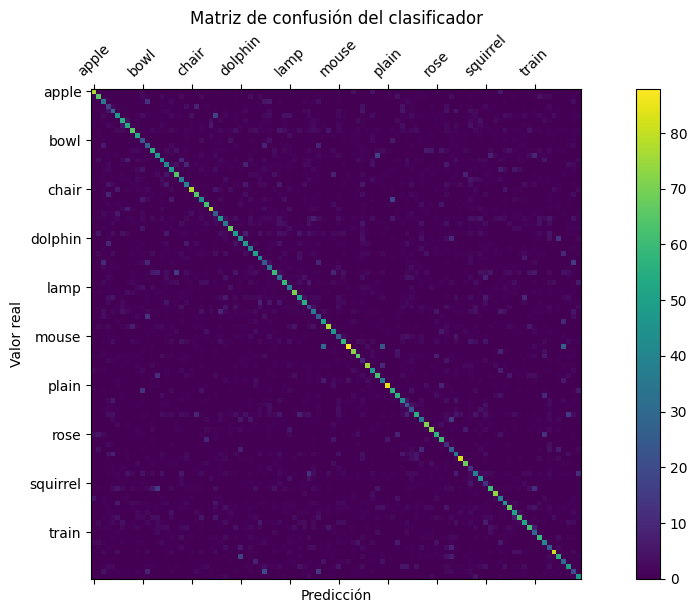

In [ ]:
# Configuramos los true_Labels
prediction = []
true_labels = []

pred = model.predict(x_test)
print(y_test.shape[0])
for i in range(y_test.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(y_test[i]))

# Definimos la matriz de Confusion
cm = confusion_matrix(prediction, true_labels)

# Imprimimos la Matriz de confusion
print("Matriz de Confusion")
print(cm)

# Graficamos la Matriz de Confusion
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Matriz de confusión del clasificador')
fig.colorbar(cax)

# Modificamos la frecuencia de las etiquetas para graficar
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks[::10], classes[::10], rotation=45)  # Mostrar cada 10 etiquetas en el eje x
plt.yticks(tick_marks[::10], classes[::10])  # Mostrar cada 10 etiquetas en el eje y

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

In [ ]:
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

               precision    recall  f1-score   support

        apple    0.76238   0.77000   0.76617       100
aquarium_fish    0.60748   0.65000   0.62802       100
         baby    0.46667   0.35000   0.40000       100
         bear    0.30909   0.17000   0.21935       100
       beaver    0.35632   0.31000   0.33155       100
          bed    0.35821   0.48000   0.41026       100
          bee    0.53333   0.56000   0.54634       100
       beetle    0.52427   0.54000   0.53202       100
      bicycle    0.38922   0.65000   0.48689       100
       bottle    0.69737   0.53000   0.60227       100
         bowl    0.41818   0.23000   0.29677       100
          boy    0.42188   0.27000   0.32927       100
       bridge    0.42748   0.56000   0.48485       100
          bus    0.39655   0.46000   0.42593       100
    butterfly    0.37398   0.46000   0.41256       100
        camel    0.39252   0.42000   0.40580       100
          can    0.45794   0.49000   0.47343       100
       ca

**Comentario**

El modelo 2 ha demostrado ser mejor que el primer modelo con las siguientes metricas:
- Test accuracy: 48.51 %
- Test Loss: 1.9849

Hemos pasado de un 30% de acurracy a un 48%.
- El proceso de entrenamiento lo hemos detenido en el minuto que la curva de validacion comienza mostrar que empeora en relacion a la curva de entrenamiento.
- El haber agregado el droput demostro que el modelo no se aprende los resultados de memoria, puesto que los datos de validaciones practicamente se encuentran siempre con mejores metricas que los datos de entrenamiento.
- la Arqutiectura de la red y le haber agregado mas datos con el aumento, ha hecho el proceso de entrenamiento mucho mas lento, pero tambien ha mejorado las metricas en un porcentaje alto. No obstante aun estamos con un accuraccy por debajo del 50%.
- La matriz de confusión demuetra una linea diagonal mucho mas activa, lo que indica mejores resultados.
- La manzana ha logrado tener un 76%, mientras que la serpiente ahora tiene un 25%.

## 4.3 Modelo 3 (Final)

En comparacion al modelo 2:

Una primera capa convolucional, con 128 filtros y un tamaño del kernel de 4x4 `(en vez 64 filtros)`. Dropout 25% `(en vez 20%)`  
Otra capa convolucional con 128 filtros y un tamaño del kernel de 3x3. Dropout 20%.`(en vez 64 filtros)`  
Una capa de pooling con un tamaño de ventana de 2x2. `(en vez 3x3)`  
Dos capas convolucional de 256 filtros y tamaño de kernel de 3x3 seguidas.Dropout 25%.`(en vez 128 filtros y dropout 20%)`  
Otra capa de pooling con un tamaño de ventana de 2x2.  
Una capa de flatten para convertir a un vector de una dimensión.  
Una capa densa con 1028 neuronas y dropout 25% (en vez e 512 filtros).  
Una última capa para clasificar las muestras.  
Se considera Aumento de imagenes.  

In [ ]:
## Modelo
model = Sequential()

# Bloque 1
model.add(Conv2D(128, (4,4), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Bloque 2
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Perceptron Multicapa para Clasificacion
model.add(Flatten())
model.add(Dense(1058, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo con aumentación de datos

training_start = time.time()
history = model.fit(datagen.flow(x_train, y_train), batch_size = 128 , epochs=25 ,validation_data=(x_test, y_test), verbose = 0)
training_stop = time.time()
training_time = round(training_stop - training_start,2)

print(f"Training time: {training_time}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training time: 764.01


In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc*100,2), '%')
print('Test Loss:', round(test_loss,4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5301 - loss: 1.8774
Test accuracy: 52.43 %
Test Loss: 1.8668


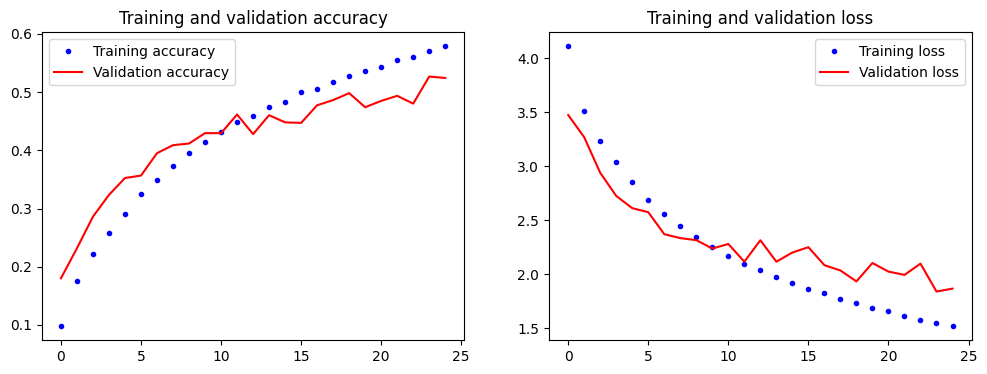

In [ ]:
# Visualize training process
training_plot(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
10000
Matriz de Confusion
[[78  0  0 ...  0  0  0]
 [ 2 63  0 ...  0  1  1]
 [ 2  0 36 ...  0  4  1]
 ...
 [ 0  0  1 ... 49  0  0]
 [ 0  0  4 ...  0 17  0]
 [ 0  1  0 ...  0  0 51]]


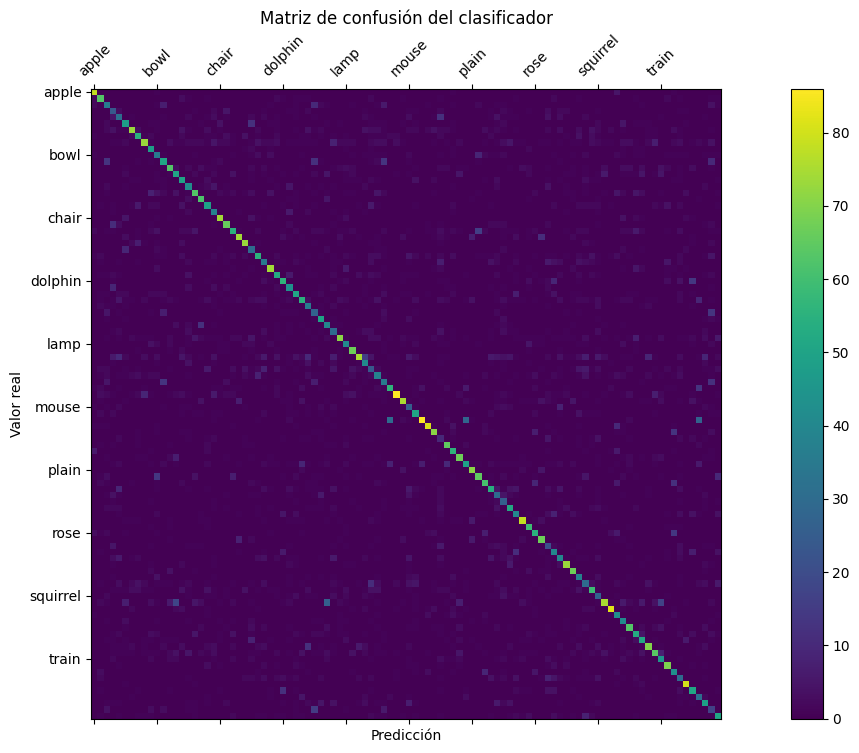

In [ ]:
# Configuramos los true_Labels
prediction = []
true_labels = []

pred = model.predict(x_test)
print(y_test.shape[0])
for i in range(y_test.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(y_test[i]))

# Definimos la matriz de Confusion
cm = confusion_matrix(prediction, true_labels)

# Imprimimos la Matriz de confusion
print("Matriz de Confusion")
print(cm)

# Graficamos la Matriz de Confusion
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Matriz de confusión del clasificador')
fig.colorbar(cax)

# Modificamos la frecuencia de las etiquetas para graficar
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks[::10], classes[::10], rotation=45)  # Mostrar cada 10 etiquetas en el eje x
plt.yticks(tick_marks[::10], classes[::10])  # Mostrar cada 10 etiquetas en el eje y

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

In [ ]:
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

               precision    recall  f1-score   support

        apple    0.90698   0.78000   0.83871       100
aquarium_fish    0.70000   0.63000   0.66316       100
         baby    0.44444   0.36000   0.39779       100
         bear    0.40000   0.24000   0.30000       100
       beaver    0.34444   0.31000   0.32632       100
          bed    0.51613   0.48000   0.49741       100
          bee    0.44785   0.73000   0.55513       100
       beetle    0.52885   0.55000   0.53922       100
      bicycle    0.36500   0.73000   0.48667       100
       bottle    0.80000   0.48000   0.60000       100
         bowl    0.40230   0.35000   0.37433       100
          boy    0.45946   0.51000   0.48341       100
       bridge    0.49219   0.63000   0.55263       100
          bus    0.45946   0.51000   0.48341       100
    butterfly    0.58824   0.50000   0.54054       100
        camel    0.54545   0.42000   0.47458       100
          can    0.46324   0.63000   0.53390       100
       ca

**Comentario**
La ultima modelacion ha entregado resultados mejores que la segunda:

- Test accuracy: 52.43 %
- Test Loss: 1.8668

Tanto el Accuracy como el Loss entropy han mejorado, no obstante no ha sido una mejora tan sustancial.

Se puede observar que el Accuracy llegó a 45% en 12 epochs, a diferencia del modelo 2 que lo alcanza a los 22 epochs. Esto hace pensar que el modelo es mas potente, no obstante despues de llegar a este nivel de Accuracy el mejoramiento comienza a estabilizarse, alcanzando el 52%, solo 7% más.

Este comportamiento hacer pensar que podriamos probar con un tercer bloque de convolucion y una segunda capa densa en la salida, pero probar esta arquitectura significaría un alto costo computacional.

Como referencia la Clase manzana ha alzanzado un 90.7% de accuracy y la Serpiente un 25.4%.

Tambien cabe la posibilidad que la naturaleza tan poco definida de las imagenes de los datos, no sea la apropiada y nunca podriamos llegar a un Accuracy relativamente alto.


============================== FIN =====================================

In [ ]:
exit()

In [ ]:
# Define the CNN architecture
from keras.layers import BatchNormalization
model = Sequential()

# Bloque 1
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bloque 2
model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Bloque 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Capa completamente conectada
model.add(Flatten())
model.add(Dense(1028, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
